# EDA 전 사전세팅

In [8]:
# EDA 사전 세팅
%matplotlib inline

import time
import os
os.environ['KMP_WARNINGS'] = 'off'
from functools import reduce
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None) ## 모든 열을 출력한다.
import seaborn as sns  #데이터 시각화 
sns.set(font="AppleGothic", 

        rc={"axes.unicode_minus":False},
        
        style='darkgrid')


In [5]:
train = pd.read_csv('/Users/choejeehyuk/분석에 필요한 데이터/신용커드 예측 경진대회/train.csv')
test = pd.read_csv('/Users/choejeehyuk/분석에 필요한 데이터/신용커드 예측 경진대회/test.csv')
train.head()

index gender car reality  child_num  income_total           income_type  \
0      0      F   N       N          0      202500.0  Commercial associate   
1      1      F   N       Y          1      247500.0  Commercial associate   
2      2      M   Y       Y          0      450000.0               Working   
3      3      F   N       Y          0      202500.0  Commercial associate   
4      4      F   Y       Y          0      157500.0         State servant   

                        edu_type     family_type           house_type  \
0               Higher education         Married  Municipal apartment   
1  Secondary / secondary special  Civil marriage    House / apartment   
2               Higher education         Married    House / apartment   
3  Secondary / secondary special         Married    House / apartment   
4               Higher education         Married    House / apartment   

   DAYS_BIRTH  DAYS_EMPLOYED  FLAG_MOBIL  work_phone  phone  email  \
0      -13899          -4709           1           0      0      0   
1      -11380          -1540           1           0      0      1   
2      -19087          -4434           1           0      1      0   
3      -15088          -2092           1           0      1      0   
4      -15037          -2105           1           0      0      0   

    occyp_type  family_size  begin_month  credit  
0          NaN          2.0         -6.0     1.0  
1     Laborers          3.0         -5.0     1.0  
2     Managers          2.0        -22.0     2.0  
3  Sales staff          2.0        -37.0     0.0  
4     Managers          2.0        -26.0     2.0

## 데이터 기본 정보

In [6]:
train.describe()

index     child_num  income_total    DAYS_BIRTH  DAYS_EMPLOYED  \
count  26457.000000  26457.000000  2.645700e+04  26457.000000   26457.000000   
mean   13228.000000      0.428658  1.873065e+05 -15958.053899   59068.750728   
std     7637.622372      0.747326  1.018784e+05   4201.589022  137475.427503   
min        0.000000      0.000000  2.700000e+04 -25152.000000  -15713.000000   
25%     6614.000000      0.000000  1.215000e+05 -19431.000000   -3153.000000   
50%    13228.000000      0.000000  1.575000e+05 -15547.000000   -1539.000000   
75%    19842.000000      1.000000  2.250000e+05 -12446.000000    -407.000000   
max    26456.000000     19.000000  1.575000e+06  -7705.000000  365243.000000   

       FLAG_MOBIL    work_phone         phone         email   family_size  \
count     26457.0  26457.000000  26457.000000  26457.000000  26457.000000   
mean          1.0      0.224742      0.294251      0.091280      2.196848   
std           0.0      0.417420      0.455714      0.288013      0.916717   
min           1.0      0.000000      0.000000      0.000000      1.000000   
25%           1.0      0.000000      0.000000      0.000000      2.000000   
50%           1.0      0.000000      0.000000      0.000000      2.000000   
75%           1.0      0.000000      1.000000      0.000000      3.000000   
max           1.0      1.000000      1.000000      1.000000     20.000000   

        begin_month        credit  
count  26457.000000  26457.000000  
mean     -26.123294      1.519560  
std       16.559550      0.702283  
min      -60.000000      0.000000  
25%      -39.000000      1.000000  
50%      -24.000000      2.000000  
75%      -12.000000      2.000000  
max        0.000000      2.000000

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

## 데이터 전처리

### 결측값 처리

In [ ]:
train.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

In [ ]:
data = train.fillna('Nan')

### 파생변수 생성

In [ ]:
def make_derivation(data):
  data['DAYS_EMPLOYED'] = data['DAYS_EMPLOYED'].map(lambda x: 0 if x > 0 else abs(x))

  feats = ['DAYS_BIRTH', 'begin_month', 'DAYS_EMPLOYED']
  for feat in feats:
    data[feat]=np.abs(data[feat])

  data = data[(data['family_size'] <= 7)]
  data = data.reset_index(drop=True)

  #data['DAYS_EMPLOYED'] = abs(data['DAYS_EMPLOYED'])
  #data['DAYS_BIRTH'] = abs(data['DAYS_BIRTH'])
  #data['begin_month'] = abs(data['begin_month'])
  
  data['new_age'] = round(abs(data['DAYS_BIRTH'])/365.5,0).astype(np.int)
  data['year_os'] = data['DAYS_EMPLOYED']//365 # 근속연수
  data['month_os'] = data['DAYS_EMPLOYED']//30 # 근속월수
  data['month_ap'] = np.floor(data['DAYS_EMPLOYED']/30) - ((np.floor(data['DAYS_EMPLOYED']/30) / 12).astype('int') * 12) # 고용된 달 
  data['week_ap'] = np.floor(data['DAYS_EMPLOYED']/7) - ((np.floor(data['DAYS_EMPLOYED']/7) / 4).astype('int') * 4) # 고용된 주
  data["bef_hire"] = data["DAYS_BIRTH"]-data["DAYS_EMPLOYED"]
  data['RATIO_EMPLOYED'] = data['DAYS_EMPLOYED']/data['DAYS_BIRTH'] # 인생 살면서 일한 비율
  data['aver_dep'] = data['income_total']/data['family_size'] 
  data['year_income'] = data['income_total'] // (data['year_os'])
  data["family-child"] = data["family_size"] - data["child_num"]
  for i in range(len(data)):
    if data['family-child'][i] < 0:
      data['family-child'][i] == 0

  data = data.replace([np.inf,np.nan],0)

  return data

In [ ]:
data = make_derivation(data)
data.head()

<ipython-input-8-22276a3a9f09>:15: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data['new_age'] = round(abs(data['DAYS_BIRTH'])/365.5,0).astype(np.int)


index gender car reality  child_num  income_total           income_type  \
0      0      F   N       N          0      202500.0  Commercial associate   
1      1      F   N       Y          1      247500.0  Commercial associate   
2      2      M   Y       Y          0      450000.0               Working   
3      3      F   N       Y          0      202500.0  Commercial associate   
4      4      F   Y       Y          0      157500.0         State servant   

                        edu_type     family_type           house_type  ...  \
0               Higher education         Married  Municipal apartment  ...   
1  Secondary / secondary special  Civil marriage    House / apartment  ...   
2               Higher education         Married    House / apartment  ...   
3  Secondary / secondary special         Married    House / apartment  ...   
4               Higher education         Married    House / apartment  ...   

   new_age  year_os  month_os  month_ap  week_ap  bef_hire RATIO_EMPLOYED  \
0       38       12       156       0.0      0.0      9190       0.338801   
1       31        4        51       3.0      0.0      9840       0.135325   
2       52       12       147       3.0      1.0     14653       0.232305   
3       41        5        69       9.0      2.0     12996       0.138653   
4       41        5        70      10.0      0.0     12932       0.139988   

   aver_dep  year_income  family-child  
0  101250.0      16875.0           2.0  
1   82500.0      61875.0           2.0  
2  225000.0      37500.0           2.0  
3  101250.0      40500.0           2.0  
4   78750.0      31500.0           2.0  

[5 rows x 30 columns]

### 데이터 타입 변경

In [ ]:
def change_type(data):
  data['child_num'] = data['child_num'].astype('object')
  data['FLAG_MOBIL'] = data['FLAG_MOBIL'].astype('object')
  data['work_phone'] = data['work_phone'].astype('object')
  data['phone'] = data['phone'].astype('object')
  data['email'] = data['email'].astype('object')
  data['occyp_type'] = data['occyp_type'].astype('object')
  data['family_size '] = data['family_size'].astype('object')
  #data['credit'] = data['credit'].astype('object')
  data['week_ap'] = data['week_ap'].astype('int')
  data['week_ap'] = data['week_ap'].astype('object')
  data['month_ap'] = data['month_ap'].astype('int')
  data['month_ap'] = data['month_ap'].astype('object')
  data['family-child'] = data['family-child'].astype('object')
  return data

In [ ]:
data = change_type(data)
data.head(5)

index gender car reality child_num  income_total           income_type  \
0      0      F   N       N         0      202500.0  Commercial associate   
1      1      F   N       Y         1      247500.0  Commercial associate   
2      2      M   Y       Y         0      450000.0               Working   
3      3      F   N       Y         0      202500.0  Commercial associate   
4      4      F   Y       Y         0      157500.0         State servant   

                        edu_type     family_type           house_type  ...  \
0               Higher education         Married  Municipal apartment  ...   
1  Secondary / secondary special  Civil marriage    House / apartment  ...   
2               Higher education         Married    House / apartment  ...   
3  Secondary / secondary special         Married    House / apartment  ...   
4               Higher education         Married    House / apartment  ...   

   year_os  month_os month_ap week_ap bef_hire RATIO_EMPLOYED  aver_dep  \
0       12       156        0       0     9190       0.338801  101250.0   
1        4        51        3       0     9840       0.135325   82500.0   
2       12       147        3       1    14653       0.232305  225000.0   
3        5        69        9       2    12996       0.138653  101250.0   
4        5        70       10       0    12932       0.139988   78750.0   

   year_income  family-child  family_size   
0      16875.0           2.0           2.0  
1      61875.0           2.0           3.0  
2      37500.0           2.0           2.0  
3      40500.0           2.0           2.0  
4      31500.0           2.0           2.0  

[5 rows x 31 columns]

### EDA

In [ ]:
def str_EDA(data):
  colors = sns.color_palette("Blues")
  for i in data.columns:
    if data[i].dtypes == 'object':
      group_data = data.groupby([i],as_index=False).count()
      
      plt.figure(figsize=(15,8))
      plt.subplot(1,2,1)
      sns.barplot(x=i,y='credit',data=group_data,palette=colors)
      plt.title('%s barplot'%i)
      plt.xticks(rotation=45)

      plt.subplot(1,2,2)
      plt.pie(group_data['credit']/100, labels=group_data[i], autopct='%.1f%%',colors=colors, startangle=90,counterclock=False)
      plt.title('%s pieplot'%i)
      plt.show()

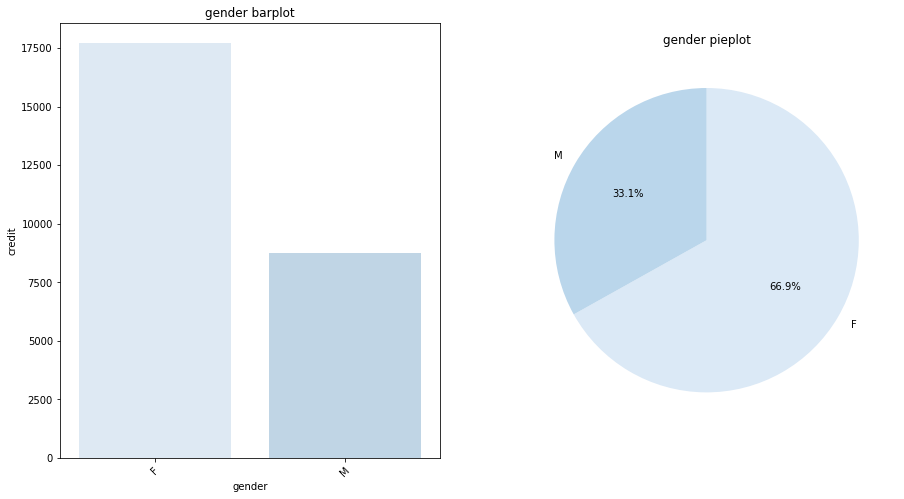

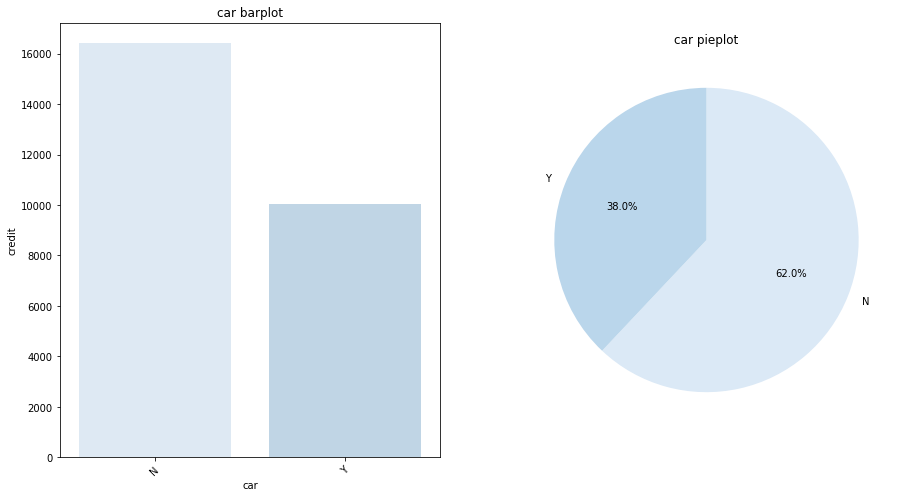

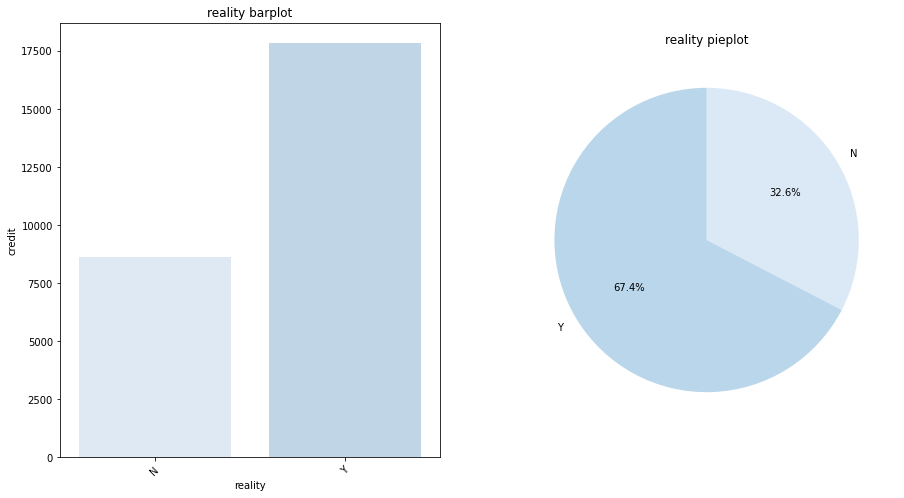

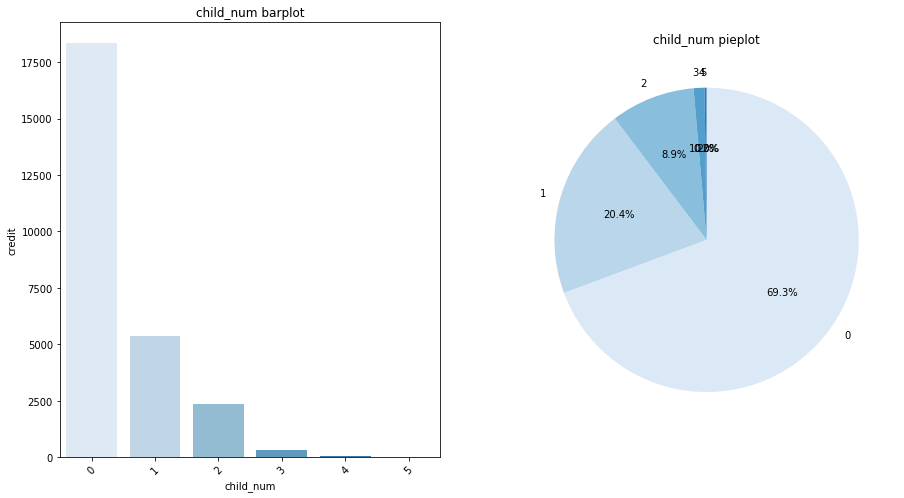

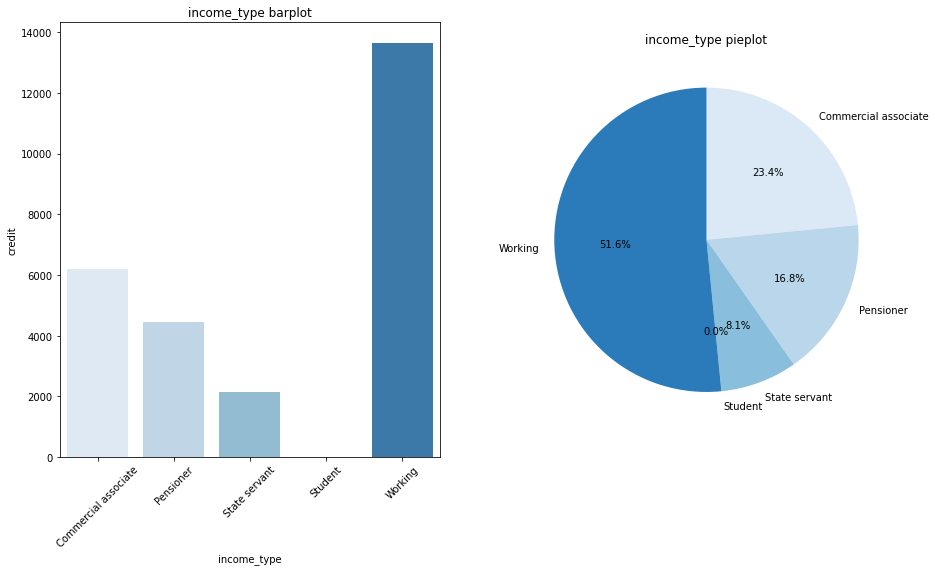

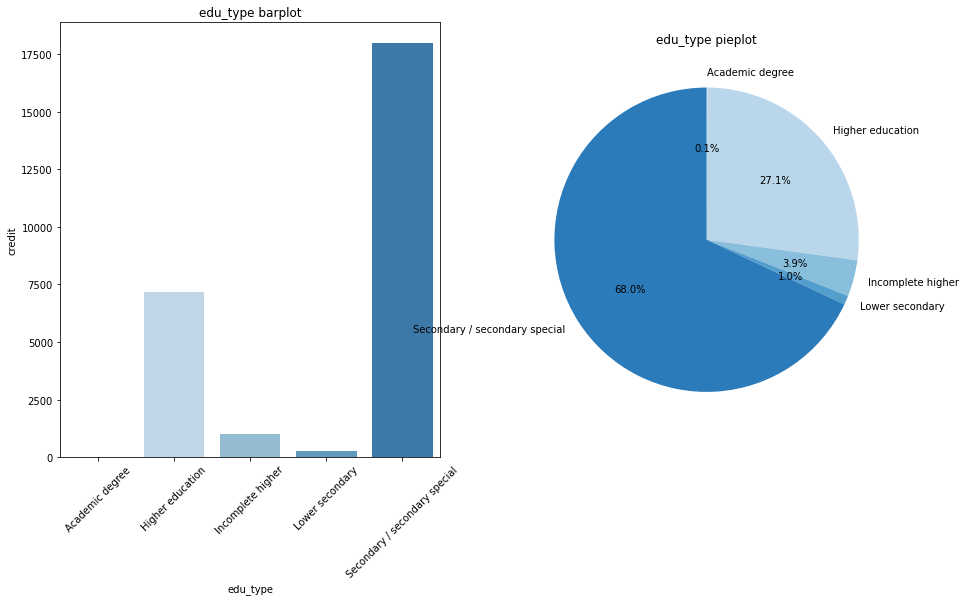

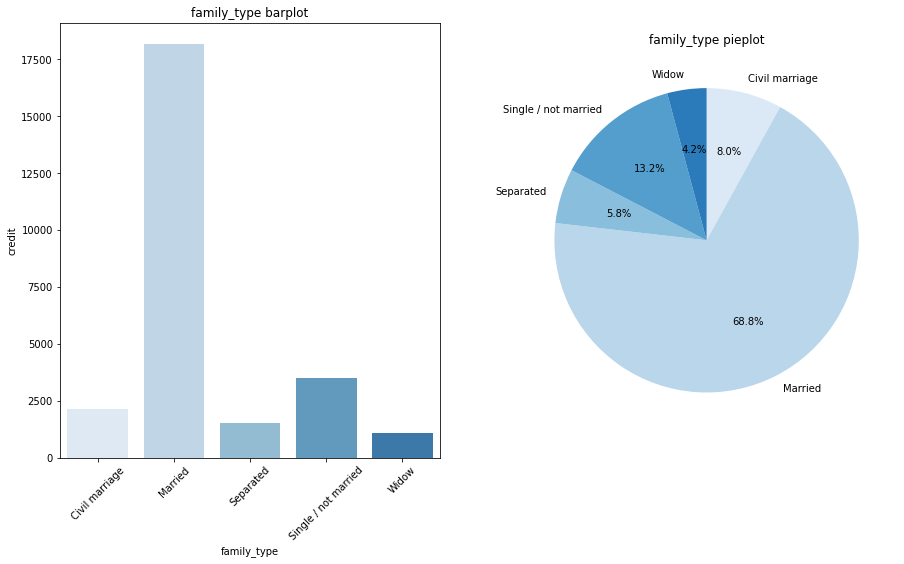

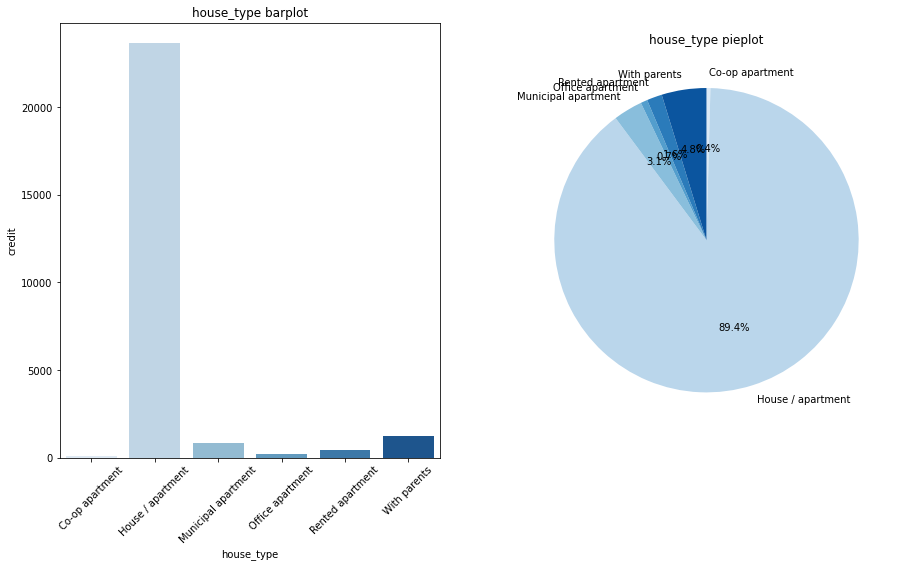

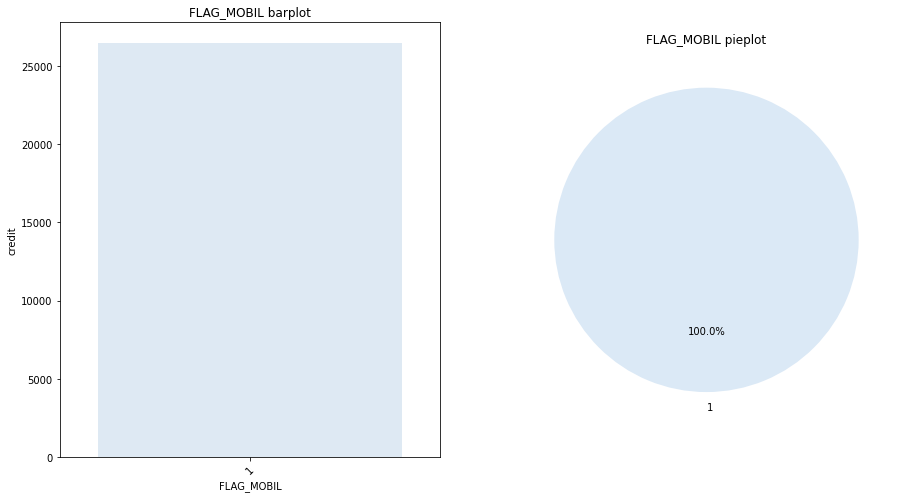

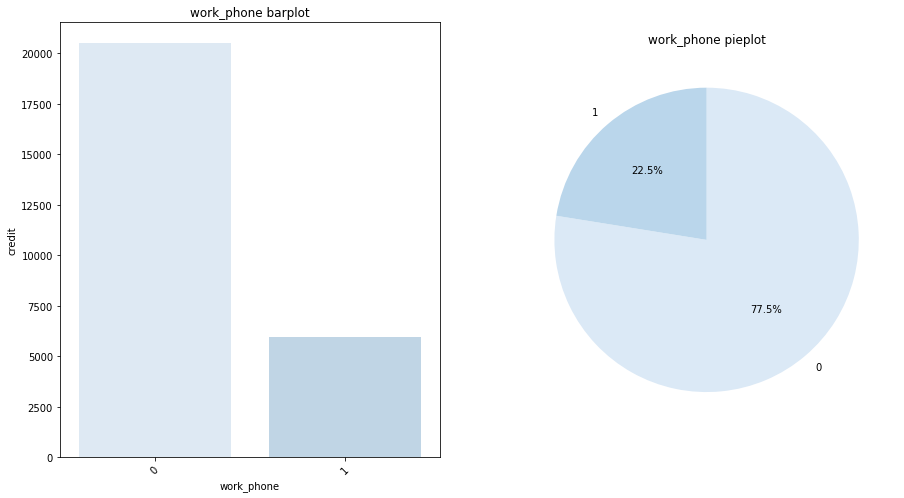

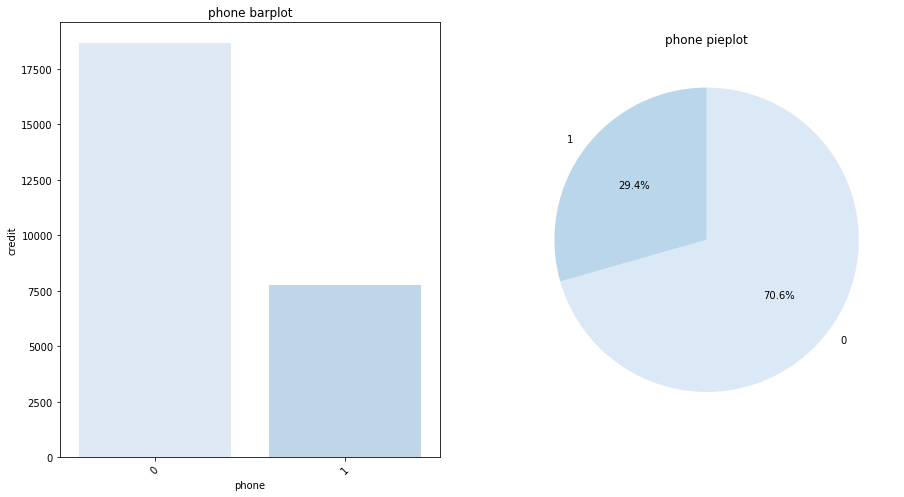

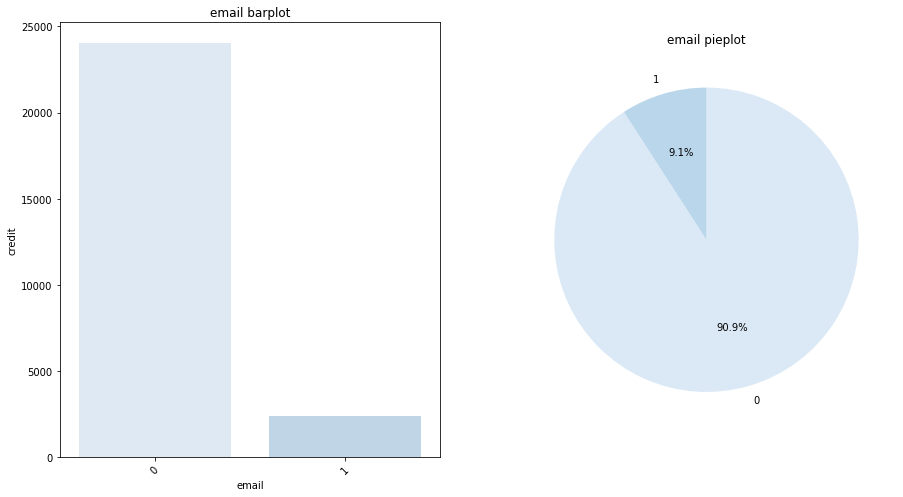

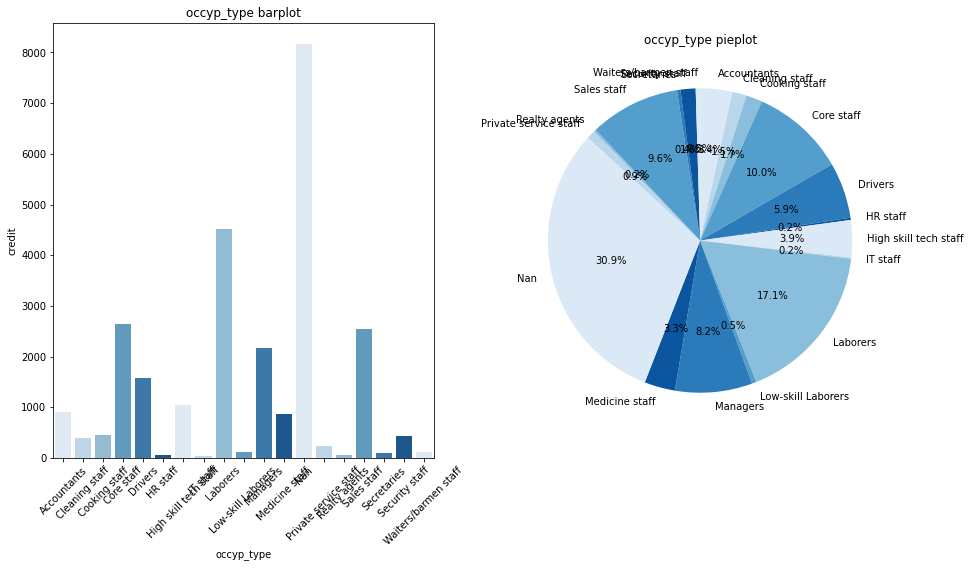

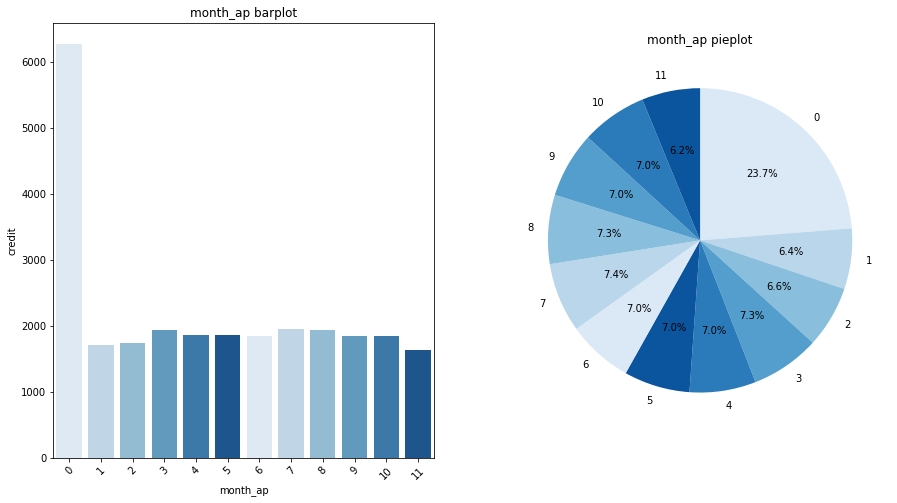

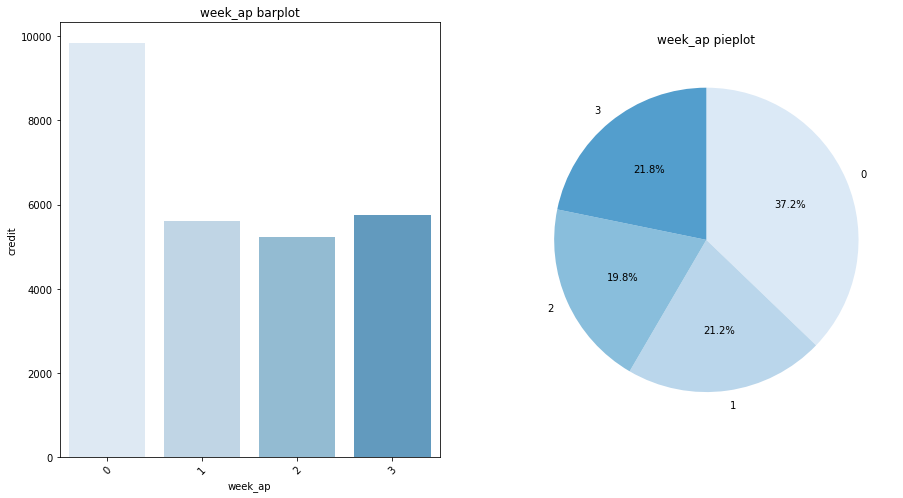

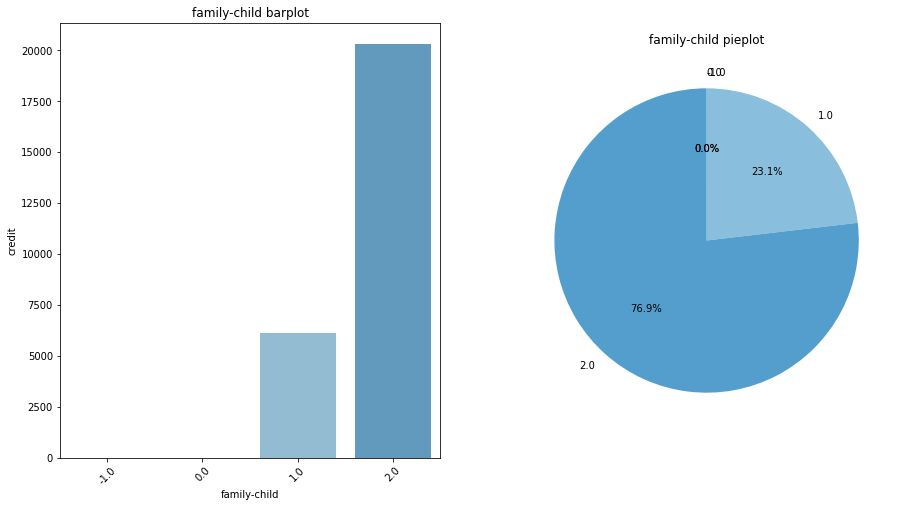

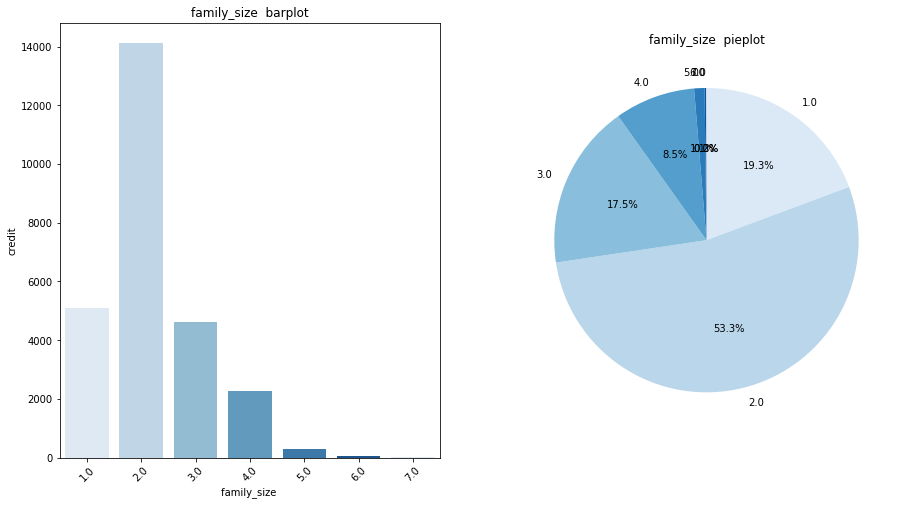

In [ ]:
str_EDA(data)

In [ ]:
def int_EDA(data):
  for i in data.columns:
    if data[i].dtypes != 'object':
      group_data = data.groupby([i],as_index=False).count()
      
      plt.figure(figsize=(15,8))
      plt.subplot(1,2,1)
      sns.distplot(data,x=data[i],bins=20)
      plt.title('%s histogram'%i)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

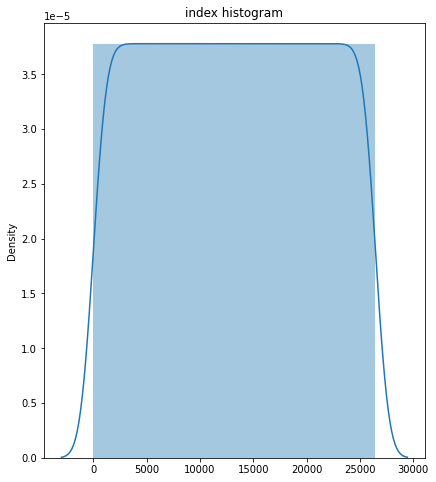

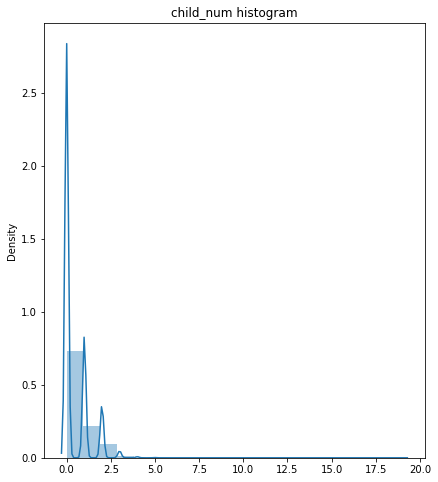

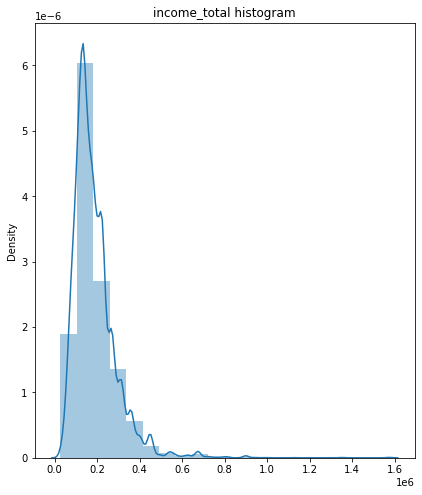

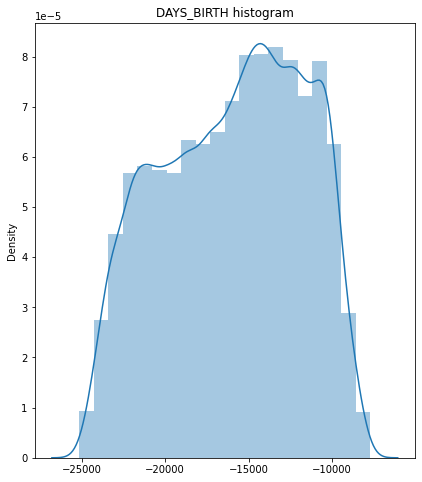

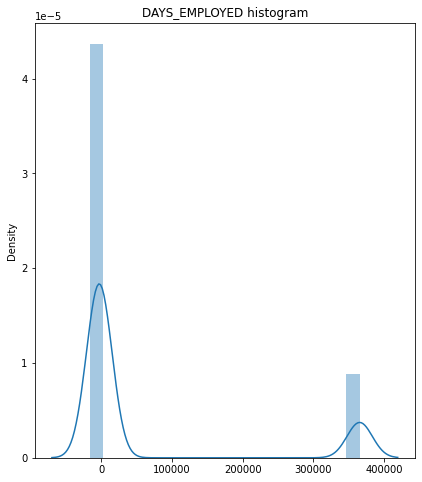

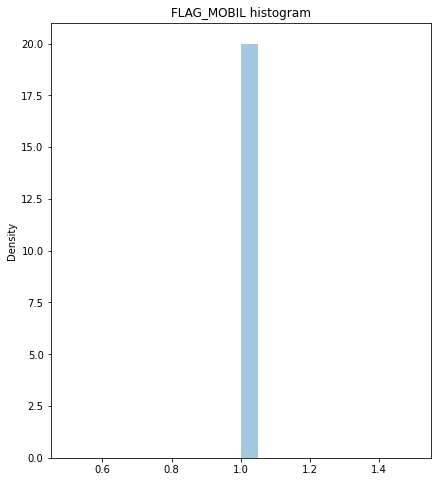

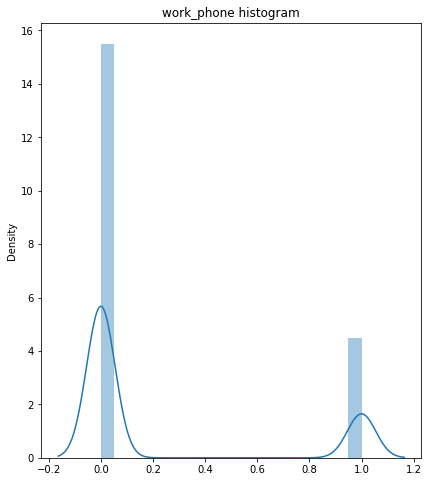

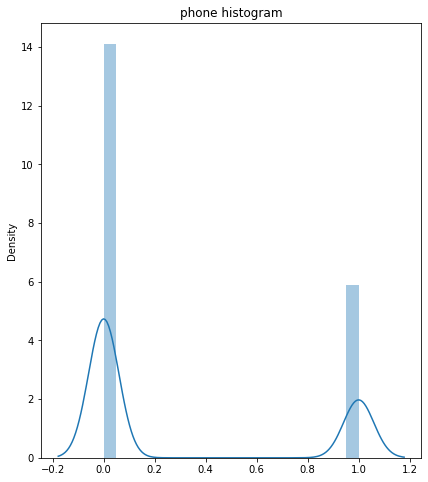

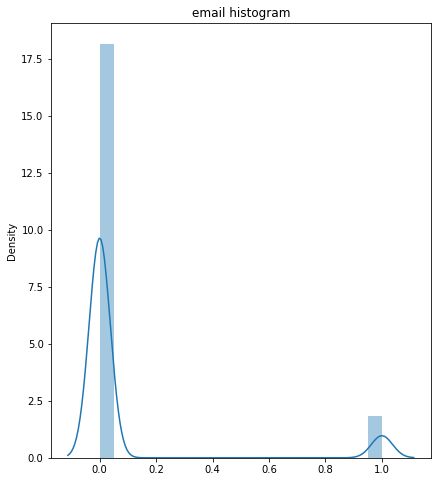

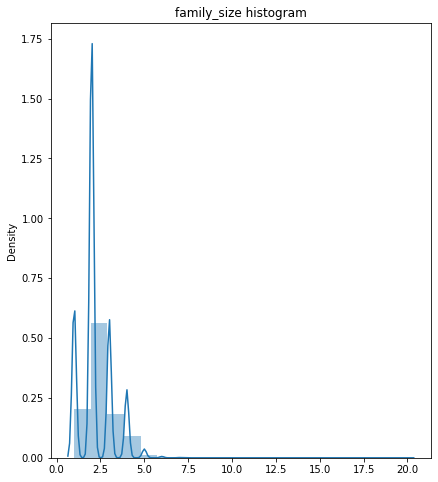

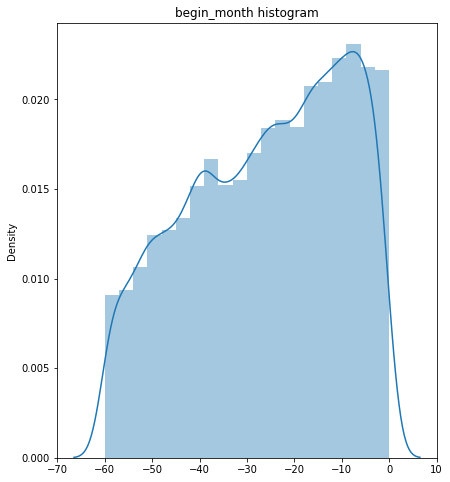

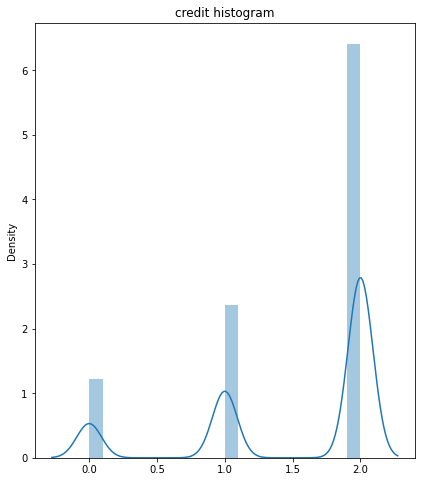

In [ ]:
int_EDA(train)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26451 entries, 0 to 26450
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           26451 non-null  int64  
 1   gender          26451 non-null  object 
 2   car             26451 non-null  object 
 3   reality         26451 non-null  object 
 4   child_num       26451 non-null  object 
 5   income_total    26451 non-null  float64
 6   income_type     26451 non-null  object 
 7   edu_type        26451 non-null  object 
 8   family_type     26451 non-null  object 
 9   house_type      26451 non-null  object 
 10  DAYS_BIRTH      26451 non-null  int64  
 11  DAYS_EMPLOYED   26451 non-null  int64  
 12  FLAG_MOBIL      26451 non-null  object 
 13  work_phone      26451 non-null  object 
 14  phone           26451 non-null  object 
 15  email           26451 non-null  object 
 16  occyp_type      26451 non-null  object 
 17  family_size     26451 non-null 

## 데이터 변수 선택

### 범주형 변수 선택

In [ ]:
def list_sep (data):
  cat_list = []
  int_list = []
  for i in data.columns:
    if data[i].dtypes == 'object':
      cat_list.append(i)
    else :
      int_list.append(i)

  return int_list, cat_list

In [ ]:
int_list, cat_list = list_sep(data)
print('int : ',int_list)
print('cat : ',cat_list)

int :  ['index', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'family_size', 'begin_month', 'credit', 'new_age', 'year_os', 'month_os', 'bef_hire', 'RATIO_EMPLOYED', 'aver_dep', 'year_income']
cat :  ['gender', 'car', 'reality', 'child_num', 'income_type', 'edu_type', 'family_type', 'house_type', 'FLAG_MOBIL', 'work_phone', 'phone', 'email', 'occyp_type', 'month_ap', 'week_ap', 'family-child', 'family_size ']


In [ ]:
from scipy.stats import chi2_contingency

def cat_selection(data):
  #H0 : 독립변수의 범주형 변수(i)에 따른 종속변수 (credit)의 비율은 차이가 있다
  #H1 : 차이가 없다

  h0,h1,chi,c_list = [],[],[],[]

  for i in cat_list:
    chi_list = []
    cross_df = pd.crosstab(data[i],data['credit'],margins=False)
    result = chi2_contingency(observed=cross_df, correction=False)

    c_list.append(i)
    chi_list.append(result[0])
    chi_list.append(result[1])
    chi_list.append(result[2])
    chi.append(chi_list)

  chi_df = pd.DataFrame(columns=['chi_2','p-value','df'],data = chi)
  chi_df.index = c_list
  
  chi_df1 = chi_df[chi_df['p-value']<0.05]
  chi_df2= chi_df1[chi_df1['chi_2']>10]

  return chi_df, chi_df2

In [ ]:
chi_df, chi_df_cat = cat_selection(data)

In [ ]:
chi_df

chi_2       p-value  df
gender         0.742683  6.898085e-01   2
car            9.366187  9.250354e-03   2
reality       11.230277  3.642304e-03   2
child_num     19.978358  2.945805e-02  10
income_type   23.800389  2.475172e-03   8
edu_type       8.886748  3.519398e-01   8
family_type   46.383397  2.009568e-07   8
house_type    37.725432  4.236293e-05  10
FLAG_MOBIL     0.000000  1.000000e+00   0
work_phone     0.385865  8.245374e-01   2
phone          7.995643  1.835558e-02   2
email          6.107595  4.717942e-02   2
occyp_type    90.398801  1.422022e-06  36
month_ap      66.017750  2.756842e-06  22
week_ap        7.283921  2.953866e-01   6
family-child  25.970734  2.254547e-04   6
family_size   39.212899  9.706224e-05  12

In [ ]:
chi_df_cat

chi_2       p-value  df
reality       11.230277  3.642304e-03   2
child_num     19.978358  2.945805e-02  10
income_type   23.800389  2.475172e-03   8
family_type   46.383397  2.009568e-07   8
house_type    37.725432  4.236293e-05  10
occyp_type    90.398801  1.422022e-06  36
month_ap      66.017750  2.756842e-06  22
family-child  25.970734  2.254547e-04   6
family_size   39.212899  9.706224e-05  12

In [ ]:
list(chi_df_cat.index)

['reality',
 'child_num',
 'income_type',
 'family_type',
 'house_type',
 'occyp_type',
 'month_ap',
 'family-child',
 'family_size ']

### 수치형 변수 선택

In [ ]:
int_list

['index',
 'income_total',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'family_size',
 'begin_month',
 'credit',
 'new_age',
 'year_os',
 'month_os',
 'bef_hire',
 'RATIO_EMPLOYED',
 'aver_dep',
 'year_income']

In [ ]:
import statsmodels.api as sm

def logis_glm_one(data):
  data['credit'] = data['credit'].astype('int')
  output = data['credit']
  for i in int_list:
    feature = data[i]
    model = sm.formula.glm('output ~ feature',data,family = sm.families.Binomial()).fit()
    print('logistic %s'%i)
    print(model.summary())
    print(model.params)
    print(np.exp(model.params))
    print(np.log(model.params))
    print()

In [ ]:
logis_glm_one(data)

logistic index
                 Generalized Linear Model Regression Results                  
Dep. Variable:                 output   No. Observations:                26451
Model:                            GLM   Df Residuals:                    26449
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                   -inf
Date:                Wed, 25 Jan 2023   Deviance:                   1.5665e+06
Time:                        08:05:43   Pearson chi2:                 9.09e+19
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.383e+15   8.25e+05   2.

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


logistic income_total
                 Generalized Linear Model Regression Results                  
Dep. Variable:                 output   No. Observations:                26451
Model:                            GLM   Df Residuals:                    26449
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                   -inf
Date:                Wed, 25 Jan 2023   Deviance:                   1.5665e+06
Time:                        08:05:44   Pearson chi2:                 9.09e+19
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    2.29e+15   8.64e+

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


                 Generalized Linear Model Regression Results                  
Dep. Variable:                 output   No. Observations:                26451
Model:                            GLM   Df Residuals:                    26449
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                   -inf
Date:                Wed, 25 Jan 2023   Deviance:                   1.5665e+06
Time:                        08:05:44   Pearson chi2:                 9.09e+19
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.037e+15   1.62e+06   1.26e+09      0.0

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)




logistic family_size
                 Generalized Linear Model Regression Results                  
Dep. Variable:                 output   No. Observations:                26451
Model:                            GLM   Df Residuals:                    26449
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                   -inf
Date:                Wed, 25 Jan 2023   Deviance:                   1.5665e+06
Time:                        08:05:44   Pearson chi2:                 9.09e+19
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    2.29e+15   1.09e

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)



Intercept    36.100696
feature      30.351545
dtype: float64



/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/family.py:947: RuntimeWarning: divide by zero encountered in log
  y * np.log(mu / (1 - mu + 1e-20)) +
/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/family.py:947: RuntimeWarning: invalid value encountered in multiply
  y * np.log(mu / (1 - mu + 1e-20)) +
/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


logistic credit
                 Generalized Linear Model Regression Results                  
Dep. Variable:                 output   No. Observations:                26451
Model:                            GLM   Df Residuals:                    26449
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 25 Jan 2023   Deviance:                   1.2698e+06
Time:                        08:05:45   Pearson chi2:                 7.64e+19
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.387e+15   9.83e+05  -1

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


logistic year_os
                 Generalized Linear Model Regression Results                  
Dep. Variable:                 output   No. Observations:                26451
Model:                            GLM   Df Residuals:                    26449
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                   -inf
Date:                Wed, 25 Jan 2023   Deviance:                   1.5665e+06
Time:                        08:05:45   Pearson chi2:                 9.09e+19
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.273e+15   5.48e+05   

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)




logistic bef_hire
                 Generalized Linear Model Regression Results                  
Dep. Variable:                 output   No. Observations:                26451
Model:                            GLM   Df Residuals:                    26449
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                   -inf
Date:                Wed, 25 Jan 2023   Deviance:                   1.5665e+06
Time:                        08:05:45   Pearson chi2:                 9.09e+19
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.244e+15   1.24e+06

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)



Intercept    2.312706e+15
feature      2.640386e+08
dtype: float64
Intercept    inf
feature      inf
dtype: float64
Intercept    35.377194
feature      19.391606
dtype: float64

logistic year_income
                 Generalized Linear Model Regression Results                  
Dep. Variable:                 output   No. Observations:                26451
Model:                            GLM   Df Residuals:                    26449
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                   -inf
Date:                Wed, 25 Jan 2023   Deviance:                   1.5665e+06
Time:                        08:05:46   Pearson chi2:                 9.09e+19
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
          

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
def logis_glm(data):
  output = data['credit'].astype('int')
  formula = 'output ~ income_total + DAYS_BIRTH + DAYS_EMPLOYED + family_size + begin_month + new_age + year_os + month_os + bef_hire + RATIO_EMPLOYED +aver_dep + year_income'
  model = sm.formula.glm(formula,data,family = sm.families.Binomial()).fit()
  return model.summary(), np.exp(model.params)

In [ ]:
logis_glm(data)

/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


(<class 'statsmodels.iolib.summary.Summary'>
 """
                  Generalized Linear Model Regression Results                  
 Dep. Variable:                 output   No. Observations:                26451
 Model:                            GLM   Df Residuals:                    26439
 Model Family:                Binomial   Df Model:                           11
 Link Function:                  logit   Scale:                          1.0000
 Method:                          IRLS   Log-Likelihood:                   -inf
 Date:                Wed, 25 Jan 2023   Deviance:                   1.5665e+06
 Time:                        08:05:46   Pearson chi2:                 9.09e+19
 No. Iterations:                     5                                         
 Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
 -----------------------------------------------------------------

In [ ]:
dt = data[data['credit'] != 2.0]
logis_glm(dt)

(<class 'statsmodels.iolib.summary.Summary'>
 """
                  Generalized Linear Model Regression Results                  
 Dep. Variable:                 output   No. Observations:                 9489
 Model:                            GLM   Df Residuals:                     9477
 Model Family:                Binomial   Df Model:                           11
 Link Function:                  logit   Scale:                          1.0000
 Method:                          IRLS   Log-Likelihood:                -6033.6
 Date:                Wed, 25 Jan 2023   Deviance:                       12067.
 Time:                        08:05:46   Pearson chi2:                 9.48e+03
 No. Iterations:                     4                                         
 Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
 -----------------------------------------------------------------

In [ ]:
dt = data[data['credit'] != 1.0]
logis_glm(dt)

/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


(<class 'statsmodels.iolib.summary.Summary'>
 """
                  Generalized Linear Model Regression Results                  
 Dep. Variable:                 output   No. Observations:                20184
 Model:                            GLM   Df Residuals:                    20172
 Model Family:                Binomial   Df Model:                           11
 Link Function:                  logit   Scale:                          1.0000
 Method:                          IRLS   Log-Likelihood:                   -inf
 Date:                Wed, 25 Jan 2023   Deviance:                   1.5665e+06
 Time:                        08:05:47   Pearson chi2:                 9.09e+19
 No. Iterations:                     4                                         
 Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
 -----------------------------------------------------------------

In [ ]:
dt = data[data['credit'] != 0.0]
logis_glm(dt)

/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


(<class 'statsmodels.iolib.summary.Summary'>
 """
                  Generalized Linear Model Regression Results                  
 Dep. Variable:                 output   No. Observations:                23229
 Model:                            GLM   Df Residuals:                    23217
 Model Family:                Binomial   Df Model:                           11
 Link Function:                  logit   Scale:                          1.0000
 Method:                          IRLS   Log-Likelihood:                   -inf
 Date:                Wed, 25 Jan 2023   Deviance:                   1.2698e+06
 Time:                        08:05:47   Pearson chi2:                 7.64e+19
 No. Iterations:                     4                                         
 Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
 -----------------------------------------------------------------

### VIF (다중공선성)

In [ ]:
data.tail()

index gender car reality child_num  income_total    income_type  \
26446  26452      F   N       N         2      225000.0  State servant   
26447  26453      F   N       Y         1      180000.0        Working   
26448  26454      F   Y       N         0      292500.0        Working   
26449  26455      M   N       Y         0      171000.0        Working   
26450  26456      F   N       N         0       81000.0        Working   

                            edu_type           family_type         house_type  \
26446  Secondary / secondary special               Married  House / apartment   
26447               Higher education             Separated  House / apartment   
26448  Secondary / secondary special        Civil marriage       With parents   
26449              Incomplete higher  Single / not married  House / apartment   
26450  Secondary / secondary special        Civil marriage  House / apartment   

       ...  year_os  month_os month_ap week_ap bef_hire RATIO_EMPLOYED  \
26446  ...        5        66        6       3    10095       0.164252   
26447  ...        6        82       10       1    12816       0.161860   
26448  ...        5        67        7       3     8067       0.199861   
26449  ...        0         3        3       3    10038       0.010547   
26450  ...        2        33        9       0    18556       0.051766   

       aver_dep  year_income  family-child  family_size   
26446   56250.0      45000.0           2.0           4.0  
26447   90000.0      30000.0           1.0           2.0  
26448  146250.0      58500.0           2.0           2.0  
26449  171000.0          0.0           1.0           1.0  
26450   40500.0      40500.0           2.0           2.0  

[5 rows x 31 columns]

### 총합 변수 선택

In [ ]:
cat_selec, int_selec = list(chi_df_cat.index),['income_total','DAYS_EMPLOYED','begin_month','new_age','aver_dep','year_income']
cat_int_selec = cat_selec + int_selec
cat_int_selec

['reality',
 'child_num',
 'income_type',
 'family_type',
 'house_type',
 'occyp_type',
 'month_ap',
 'family-child',
 'family_size ',
 'income_total',
 'DAYS_EMPLOYED',
 'begin_month',
 'new_age',
 'aver_dep',
 'year_income']

In [ ]:
for i in cat_selec:
  print(i)

reality
child_num
income_type
family_type
house_type
occyp_type
month_ap
family-child
family_size 


In [ ]:
for i in cat_selec:
  data[i] = data[i].astype('object')

## 최종 데이터 셋 구성
+ 변수 선택을 통해 적합한 칼럼만 분석에 사용

In [ ]:
df_train = data[cat_int_selec]
df_train

reality child_num           income_type           family_type  \
0           N         0  Commercial associate               Married   
1           Y         1  Commercial associate        Civil marriage   
2           Y         0               Working               Married   
3           Y         0  Commercial associate               Married   
4           Y         0         State servant               Married   
...       ...       ...                   ...                   ...   
26446       N         2         State servant               Married   
26447       Y         1               Working             Separated   
26448       N         0               Working        Civil marriage   
26449       Y         0               Working  Single / not married   
26450       N         0               Working        Civil marriage   

                house_type      occyp_type month_ap family-child family_size   \
0      Municipal apartment             Nan        0          2.0          2.0   
1        House / apartment        Laborers        3          2.0          3.0   
2        House / apartment        Managers        3          2.0          2.0   
3        House / apartment     Sales staff        9          2.0          2.0   
4        House / apartment        Managers       10          2.0          2.0   
...                    ...             ...      ...          ...          ...   
26446    House / apartment      Core staff        6          2.0          4.0   
26447    House / apartment             Nan       10          1.0          2.0   
26448         With parents      Core staff        7          2.0          2.0   
26449    House / apartment        Laborers        3          1.0          1.0   
26450    House / apartment  Security staff        9          2.0          2.0   

       income_total  DAYS_EMPLOYED  begin_month  new_age  aver_dep  \
0          202500.0           4709          6.0       38  101250.0   
1          247500.0           1540          5.0       31   82500.0   
2          450000.0           4434         22.0       52  225000.0   
3          202500.0           2092         37.0       41  101250.0   
4          157500.0           2105         26.0       41   78750.0   
...             ...            ...          ...      ...       ...   
26446      225000.0           1984          2.0       33   56250.0   
26447      180000.0           2475         47.0       42   90000.0   
26448      292500.0           2015         25.0       28  146250.0   
26449      171000.0            107         59.0       28  171000.0   
26450       81000.0           1013          9.0       54   40500.0   

       year_income  
0          16875.0  
1          61875.0  
2          37500.0  
3          40500.0  
4          31500.0  
...            ...  
26446      45000.0  
26447      30000.0  
26448      58500.0  
26449          0.0  
26450      40500.0  

[26451 rows x 15 columns]

In [ ]:
#df_train.to_csv('/content/drive/MyDrive/신용카드/df_train.csv',index=False)

## 모델링 전처리

In [1]:

# 모델링
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from category_encoders.ordinal import OrdinalEncoder
from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.cluster import KMeans

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from skopt import BayesSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import balanced_accuracy_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import mean_absolute_error


from xgboost import plot_importance

### train test split

In [ ]:
X = df_train
y = data['credit']

In [ ]:
#train = df_train.copy()
#X = train.drop(['credit'],axis=1)
#y = df_train['credit']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.2, random_state = 2023, shuffle=False)
print('X_train : ', X_train.shape)
print('y_train : ', y_train.shape)
print('X_valid : ', X_valid.shape)
print('y_valid : ', y_valid.shape)

X_train :  (21160, 15)
y_train :  (21160,)
X_valid :  (5291, 15)
y_valid :  (5291,)


### 인코딩 : OrdinalEncoder

In [ ]:
train_int, train_cat = list_sep(X_train)
print('train_cat : ',train_cat)
print('train_int : ',train_int)

train_cat :  ['reality', 'child_num', 'income_type', 'family_type', 'house_type', 'occyp_type', 'month_ap', 'family-child', 'family_size ']
train_int :  ['income_total', 'DAYS_EMPLOYED', 'begin_month', 'new_age', 'aver_dep', 'year_income']


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

Encoder = OrdinalEncoder()
X_train_encoder = Encoder.fit_transform(X_train[train_cat],y_train)

print('X_train_encoder.shape :',X_train_encoder.shape)
print('len(train_cat) : ', len(train_cat))

X_train_encoder.shape : (21160, 9)
len(train_cat) :  9


### 스케일링 : StandardScaler
+ 분류에 유용

In [ ]:
from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler()
X_train_Scaled = X_train[train_int] = Scaler.fit_transform(X_train[train_int],y_train)
print('X_train_Scaled.shape : ',X_train_Scaled.shape)
print('len(train_int) : ',len(train_int))

X_train_Scaled.shape :  (21160, 6)
len(train_int) :  6


### 데이터 프레임 생성

In [ ]:
X_train_encoder = pd.DataFrame(X_train_encoder)
X_train_encoder.columns = train_cat

X_train_Scaled = pd.DataFrame(X_train_Scaled)
X_train_Scaled.columns = train_int

pre_X_train = pd.concat([X_train_encoder,X_train_Scaled],axis=1)
pre_X_train

reality  child_num  income_type  family_type  house_type  occyp_type  \
0          0.0        0.0          0.0          1.0         2.0        12.0   
1          1.0        1.0          0.0          0.0         1.0         8.0   
2          1.0        0.0          4.0          1.0         1.0        10.0   
3          1.0        0.0          0.0          1.0         1.0        15.0   
4          1.0        0.0          2.0          1.0         1.0        10.0   
...        ...        ...          ...          ...         ...         ...   
21155      1.0        1.0          4.0          1.0         1.0        10.0   
21156      1.0        0.0          1.0          4.0         1.0        12.0   
21157      1.0        0.0          1.0          1.0         1.0        12.0   
21158      1.0        2.0          4.0          1.0         1.0         8.0   
21159      0.0        0.0          1.0          1.0         1.0        12.0   

       month_ap  family-child  family_size   income_total  DAYS_EMPLOYED  \
0           0.0           3.0           1.0      0.155552       1.056337   
1           3.0           3.0           2.0      0.603183      -0.278348   
2           3.0           3.0           1.0      2.617524       0.940515   
3           9.0           3.0           1.0      0.155552      -0.045863   
4          10.0           3.0           1.0     -0.292080      -0.040388   
...         ...           ...           ...           ...            ...   
21155       0.0           3.0           2.0      1.274630      -0.314148   
21156       0.0           2.0           0.0     -0.829237      -0.926949   
21157       0.0           3.0           1.0      0.155552      -0.926949   
21158       0.0           3.0           3.0      0.379367       0.139030   
21159       0.0           3.0           1.0     -0.963527      -0.926949   

       begin_month   new_age  aver_dep  year_income  
0        -1.216428 -0.490897  0.006481    -0.413602  
1        -1.276886 -1.097830 -0.251629     0.307754  
2        -0.249098  0.722967  1.710003    -0.082981  
3         0.657773 -0.230783  0.006481    -0.034890  
4        -0.007266 -0.230783 -0.303250    -0.179162  
...            ...       ...       ...          ...  
21155    -0.853679 -1.011125  0.058103     0.999054  
21156    -0.430473  1.850127  0.037454    -0.684111  
21157     0.718231  1.763423  0.006481    -0.684111  
21158     0.053192 -1.184534 -0.612982    -0.082981  
21159     1.080980  1.243195 -0.767847    -0.684111  

[21160 rows x 15 columns]

In [ ]:
#pre_X = pre_X_train.copy()
#pre_X['y_train'] = y_train
#pre_X.to_csv('/content/drive/MyDrive/신용카드/Xy_train_nonsmote.csv',index=False)
#pre_X

### 오버 샘플링 : SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=23)
pre_X_train_over, y_train_over = smote.fit_resample(pre_X_train, y_train)

print('X_train : ', pre_X_train.shape)
print('y_train : ', y_train.shape)
print('X_train_over : ', pre_X_train_over.shape)
print('y_train_over : ', y_train_over.shape)

X_train :  (21160, 15)
y_train :  (21160,)
X_train_over :  (40851, 15)
y_train_over :  (40851,)


In [ ]:
Xy_train = pre_X_train_over.copy()
Xy_train['credit'] = y_train_over
Xy_train

reality  child_num  income_type  family_type  house_type  occyp_type  \
0      0.000000        0.0          0.0     1.000000         2.0        12.0   
1      1.000000        1.0          0.0     0.000000         1.0         8.0   
2      1.000000        0.0          4.0     1.000000         1.0        10.0   
3      1.000000        0.0          0.0     1.000000         1.0        15.0   
4      1.000000        0.0          2.0     1.000000         1.0        10.0   
...         ...        ...          ...          ...         ...         ...   
40846  0.000000        1.0          0.0     0.000000         1.0        15.0   
40847  1.000000        0.0          0.0     2.931896         1.0         0.0   
40848  0.000000        2.0          4.0     1.000000         1.0         8.0   
40849  0.306822        1.0          4.0     1.000000         1.0         3.0   
40850  1.000000        0.0          4.0     1.000000         1.0         8.0   

        month_ap  family-child  family_size   income_total  DAYS_EMPLOYED  \
0       0.000000      3.000000      1.000000      0.155552       1.056337   
1       3.000000      3.000000      2.000000      0.603183      -0.278348   
2       3.000000      3.000000      1.000000      2.617524       0.940515   
3       9.000000      3.000000      1.000000      0.155552      -0.045863   
4      10.000000      3.000000      1.000000     -0.292080      -0.040388   
...          ...           ...           ...           ...            ...   
40846   6.000000      3.000000      2.000000     -0.515895      -0.843978   
40847   9.965948      2.034052      0.034052      0.178416       1.484805   
40848   5.000000      3.000000      3.000000     -0.264117       0.186000   
40849   8.693178      3.000000      2.000000     -0.894855       0.568645   
40850   0.702407      3.000000      1.000000     -0.288358      -0.287807   

       begin_month   new_age  aver_dep  year_income  credit  
0        -1.216428 -0.490897  0.006481    -0.413602       1  
1        -1.276886 -1.097830 -0.251629     0.307754       1  
2        -0.249098  0.722967  1.710003    -0.082981       2  
3         0.657773 -0.230783  0.006481    -0.034890       0  
4        -0.007266 -0.230783 -0.303250    -0.179162       2  
...            ...       ...       ...          ...     ...  
40846    -0.633944 -0.751011 -0.767847    -0.684111       1  
40847    -1.573000 -0.608209  1.368630    -0.465248       1  
40848     1.768680 -1.027353 -0.835606    -0.295261       1  
40849     0.080675 -1.117537 -0.942657    -0.505062       1  
40850    -1.579176 -0.837716 -0.300675     0.079643       1  

[40851 rows x 16 columns]

In [ ]:
print(len(Xy_train[Xy_train['credit'] == 2.0]))
print(len(Xy_train[Xy_train['credit'] == 1.0]))
print(len(Xy_train[Xy_train['credit'] == 0.0]))

13617
13617
13617


In [ ]:
def Xy_train_data(X_test):
  X_test_encoder = Encoder.transform(X_test[train_cat])
  X_test_Scaled = Scaler.transform(X_test[train_int])

  X_test_encoder = pd.DataFrame(X_test_encoder)
  X_test_encoder.columns = train_cat

  X_test_Scaled = pd.DataFrame(X_test_Scaled)
  X_test_Scaled.columns = train_int

  pre_X_test = pd.concat([X_test_encoder,X_test_Scaled],axis=1)
  return pre_X_test

### 최종 데이터 셋

In [ ]:
Xy_train

reality  child_num  income_type  family_type  house_type  occyp_type  \
0      0.000000        0.0          0.0     1.000000         2.0        12.0   
1      1.000000        1.0          0.0     0.000000         1.0         8.0   
2      1.000000        0.0          4.0     1.000000         1.0        10.0   
3      1.000000        0.0          0.0     1.000000         1.0        15.0   
4      1.000000        0.0          2.0     1.000000         1.0        10.0   
...         ...        ...          ...          ...         ...         ...   
40846  0.000000        1.0          0.0     0.000000         1.0        15.0   
40847  1.000000        0.0          0.0     2.931896         1.0         0.0   
40848  0.000000        2.0          4.0     1.000000         1.0         8.0   
40849  0.306822        1.0          4.0     1.000000         1.0         3.0   
40850  1.000000        0.0          4.0     1.000000         1.0         8.0   

        month_ap  family-child  family_size   income_total  DAYS_EMPLOYED  \
0       0.000000      3.000000      1.000000      0.155552       1.056337   
1       3.000000      3.000000      2.000000      0.603183      -0.278348   
2       3.000000      3.000000      1.000000      2.617524       0.940515   
3       9.000000      3.000000      1.000000      0.155552      -0.045863   
4      10.000000      3.000000      1.000000     -0.292080      -0.040388   
...          ...           ...           ...           ...            ...   
40846   6.000000      3.000000      2.000000     -0.515895      -0.843978   
40847   9.965948      2.034052      0.034052      0.178416       1.484805   
40848   5.000000      3.000000      3.000000     -0.264117       0.186000   
40849   8.693178      3.000000      2.000000     -0.894855       0.568645   
40850   0.702407      3.000000      1.000000     -0.288358      -0.287807   

       begin_month   new_age  aver_dep  year_income  credit  
0        -1.216428 -0.490897  0.006481    -0.413602       1  
1        -1.276886 -1.097830 -0.251629     0.307754       1  
2        -0.249098  0.722967  1.710003    -0.082981       2  
3         0.657773 -0.230783  0.006481    -0.034890       0  
4        -0.007266 -0.230783 -0.303250    -0.179162       2  
...            ...       ...       ...          ...     ...  
40846    -0.633944 -0.751011 -0.767847    -0.684111       1  
40847    -1.573000 -0.608209  1.368630    -0.465248       1  
40848     1.768680 -1.027353 -0.835606    -0.295261       1  
40849     0.080675 -1.117537 -0.942657    -0.505062       1  
40850    -1.579176 -0.837716 -0.300675     0.079643       1  

[40851 rows x 16 columns]

In [ ]:
#Xy_train.to_csv('/content/drive/MyDrive/신용카드/Xy_train.csv',index=False)

In [ ]:
pre_X_valid = Xy_train_data(X_valid)
pre_X_valid

reality  child_num  income_type  family_type  house_type  occyp_type  \
0         1.0        0.0          1.0          4.0         1.0        12.0   
1         0.0        0.0          4.0          1.0         5.0        12.0   
2         1.0        1.0          4.0          1.0         1.0        12.0   
3         0.0        0.0          4.0          1.0         1.0        12.0   
4         1.0        0.0          2.0          1.0         1.0        12.0   
...       ...        ...          ...          ...         ...         ...   
5286      0.0        2.0          2.0          1.0         1.0         3.0   
5287      1.0        1.0          4.0          2.0         1.0        12.0   
5288      0.0        0.0          4.0          0.0         5.0         3.0   
5289      1.0        0.0          4.0          3.0         1.0         8.0   
5290      0.0        0.0          4.0          0.0         1.0        17.0   

      month_ap  family-child  family_size   income_total  DAYS_EMPLOYED  \
0          0.0           2.0           0.0     -0.292080      -0.926949   
1          4.0           3.0           1.0     -0.515895      -0.560953   
2          1.0           3.0           2.0      0.155552       0.453644   
3          5.0           3.0           1.0     -0.829237       1.869614   
4          7.0           3.0           1.0     -1.187342       3.873537   
...        ...           ...           ...           ...            ...   
5286       6.0           3.0           3.0      0.379367      -0.091349   
5287      10.0           2.0           1.0     -0.068264       0.115445   
5288       7.0           3.0           1.0      1.050814      -0.078293   
5289       3.0           2.0           0.0     -0.157790      -0.881884   
5290       9.0           3.0           1.0     -1.053053      -0.500304   

      begin_month   new_age  aver_dep  year_income  
0        0.113650  2.023536  0.780809    -0.684111  
1       -1.579176 -0.837716 -0.458116     0.397924  
2        1.141438  0.202740 -0.458116    -0.278356  
3       -1.276886  0.029330 -0.674928    -0.591938  
4        1.080980  0.896377 -0.922713    -0.649214  
...           ...       ...       ...          ...  
5286    -1.458260 -0.924420 -0.612982     0.037245  
5287     1.262354 -0.144079 -0.148385    -0.203207  
5288    -0.067724 -1.357943  0.625943     0.253652  
5289     1.987852 -1.357943  0.966648    -0.684111  
5290    -1.035054  0.896377 -0.829793    -0.034890  

[5291 rows x 15 columns]

In [ ]:
len(y_valid)

5291

In [ ]:
y_valid = y_valid.reset_index(drop=True)
#pre_valid = pre_X_valid.copy()
#pre_valid['y_train'] = y_valid.copy()
#pre_valid.to_csv('/content/drive/MyDrive/신용카드/Xy_valid.csv', index=False)
#pre_valid

reality  child_num  income_type  family_type  house_type  occyp_type  \
0         1.0        0.0          1.0          4.0         1.0        12.0   
1         0.0        0.0          4.0          1.0         5.0        12.0   
2         1.0        1.0          4.0          1.0         1.0        12.0   
3         0.0        0.0          4.0          1.0         1.0        12.0   
4         1.0        0.0          2.0          1.0         1.0        12.0   
...       ...        ...          ...          ...         ...         ...   
5286      0.0        2.0          2.0          1.0         1.0         3.0   
5287      1.0        1.0          4.0          2.0         1.0        12.0   
5288      0.0        0.0          4.0          0.0         5.0         3.0   
5289      1.0        0.0          4.0          3.0         1.0         8.0   
5290      0.0        0.0          4.0          0.0         1.0        17.0   

      month_ap  family-child  family_size   income_total  DAYS_EMPLOYED  \
0          0.0           2.0           0.0     -0.292080      -0.926949   
1          4.0           3.0           1.0     -0.515895      -0.560953   
2          1.0           3.0           2.0      0.155552       0.453644   
3          5.0           3.0           1.0     -0.829237       1.869614   
4          7.0           3.0           1.0     -1.187342       3.873537   
...        ...           ...           ...           ...            ...   
5286       6.0           3.0           3.0      0.379367      -0.091349   
5287      10.0           2.0           1.0     -0.068264       0.115445   
5288       7.0           3.0           1.0      1.050814      -0.078293   
5289       3.0           2.0           0.0     -0.157790      -0.881884   
5290       9.0           3.0           1.0     -1.053053      -0.500304   

      begin_month   new_age  aver_dep  year_income  y_train  
0        0.113650  2.023536  0.780809    -0.684111        1  
1       -1.579176 -0.837716 -0.458116     0.397924        0  
2        1.141438  0.202740 -0.458116    -0.278356        2  
3       -1.276886  0.029330 -0.674928    -0.591938        1  
4        1.080980  0.896377 -0.922713    -0.649214        2  
...           ...       ...       ...          ...      ...  
5286    -1.458260 -0.924420 -0.612982     0.037245        1  
5287     1.262354 -0.144079 -0.148385    -0.203207        2  
5288    -0.067724 -1.357943  0.625943     0.253652        2  
5289     1.987852 -1.357943  0.966648    -0.684111        2  
5290    -1.035054  0.896377 -0.829793    -0.034890        2  

[5291 rows x 16 columns]

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/신용카드/test.csv')
test = make_derivation(test)
test = change_type(test)
X_test = test[cat_int_selec]
X_test
#Xy_train_data(test)

<ipython-input-8-22276a3a9f09>:15: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data['new_age'] = round(abs(data['DAYS_BIRTH'])/365.5,0).astype(np.int)


reality child_num           income_type     family_type  \
0          N         0             Pensioner  Civil marriage   
1          Y         0         State servant         Married   
2          Y         0               Working         Married   
3          N         0  Commercial associate         Married   
4          Y         0         State servant         Married   
...      ...       ...                   ...             ...   
9995       Y         0               Working         Married   
9996       Y         0               Working  Civil marriage   
9997       Y         0               Working         Married   
9998       N         0  Commercial associate         Married   
9999       Y         0               Working         Married   

             house_type      occyp_type month_ap family-child family_size   \
0     House / apartment               0        0          2.0          2.0   
1     House / apartment      Core staff        1          2.0          2.0   
2     House / apartment        Laborers        7          2.0          2.0   
3     House / apartment         Drivers        0          2.0          2.0   
4     House / apartment        Managers        0          2.0          2.0   
...                 ...             ...      ...          ...          ...   
9995  House / apartment     Accountants        1          2.0          2.0   
9996  House / apartment        Laborers        7          2.0          2.0   
9997  House / apartment  Medicine staff       11          2.0          2.0   
9998  House / apartment               0        0          2.0          2.0   
9999  House / apartment        Laborers        6          2.0          2.0   

      income_total  DAYS_EMPLOYED  begin_month  new_age  aver_dep  year_income  
0         112500.0              0         60.0       60   56250.0          0.0  
1         135000.0           8671         36.0       52   67500.0       5869.0  
2          69372.0            217         40.0       43   34686.0          0.0  
3         112500.0           2531         41.0       53   56250.0      18750.0  
4         225000.0           9385          8.0       49  112500.0       9000.0  
...            ...            ...          ...      ...       ...          ...  
9995      202500.0           5434         19.0       51  101250.0      14464.0  
9996      202500.0           1315         34.0       30  101250.0      67500.0  
9997      292500.0          14018         55.0       57  146250.0       7697.0  
9998      180000.0           1085         33.0       45   90000.0      90000.0  
9999      270000.0            187         11.0       25  135000.0          0.0  

[10000 rows x 15 columns]

In [ ]:
for i in range(len(X_test)):
  if X_test['occyp_type'][i] == 0:
     X_test['occyp_type'][i] = 'Nan'

<ipython-input-65-6bfc55eb5829>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['occyp_type'][i] = 'Nan'


In [ ]:
pre_X_test = Xy_train_data(X_test)
#pre_X_test.to_csv('/content/drive/MyDrive/신용카드/X_test.csv',index=False)

## 모델링